<a href="https://colab.research.google.com/github/Leeyeomin/202104289-/blob/main/%EB%87%8C%EC%A2%85%EC%96%91_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd {202104289-}

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

!ssize.empty()

no  yes
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import umap
import seaborn as sns
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical



In [115]:

os.listdir('/content/drive/MyDrive/archive')

['no', 'yes']

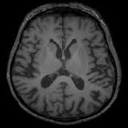

In [119]:
im =Image.open('/content/drive/MyDrive/archive/no/10 no.jpg').resize((128,128))
im

In [120]:
os.chdir("/content/drive/MyDrive/archive")
img_dir='/content/drive/MyDrive/archive'
yes=os.listdir('/content/drive/MyDrive/archive/yes')
no=os.listdir('/content/drive/MyDrive/archive/no')

In [ ]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [136]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [ ]:
len(data_target)==len(data)

In [139]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
data

array(['Y109.JPG', 'Y16.JPG', 'Y117.JPG', 'Y105.jpg', 'Y147.JPG',
       'Y102.jpg', 'Y108.jpg', 'Y153.jpg', 'Y157.JPG', 'Y116.JPG',
       'Y154.jpg', 'Y155.JPG', 'Y15.jpg', 'Y111.JPG', 'Y148.JPG',
       'Y146.JPG', 'Y120.JPG', 'Y158.JPG', 'Y112.JPG', 'Y101.jpg',
       'Y106.jpg', 'Y12.jpg', 'Y115.JPG', 'Y103.jpg', 'Y161.JPG',
       'Y160.JPG', 'Y113.JPG', 'Y159.JPG', 'Y11.jpg', 'Y107.jpg',
       'Y156.JPG', 'Y100.JPG', 'Y114.JPG', 'Y13.jpg', 'Y10.jpg',
       'Y14.jpg', 'Y1.jpg', 'Y104.jpg', 'Y17.jpg', 'Y258.JPG', 'Y19.JPG',
       'Y255.JPG', 'Y193.JPG', 'Y257.jpg', 'Y170.JPG', 'Y162.jpg',
       'Y259.JPG', 'Y195.JPG', 'Y2.jpg', 'Y182.JPG', 'Y242.JPG',
       'Y194.jpg', 'Y21.jpg', 'Y20.jpg', 'Y167.JPG', 'Y186.jpg',
       'Y18.JPG', 'Y27.jpg', 'Y165.JPG', 'Y254.jpg', 'Y181.jpg',
       'Y256.JPG', 'Y183.jpg', 'Y168.jpg', 'Y253.JPG', 'Y166.JPG',
       'Y244.JPG', 'Y187.jpg', 'Y188.jpg', 'Y243.JPG', 'Y180.jpg',
       'Y245.jpg', 'Y184.JPG', 'Y192.JPG', 'Y26.jpg', 'Y251.JPG',
 

In [137]:
yes_values=os.listdir('/content/drive/MyDrive/archive/yes')
no_values=os.listdir('/content/drive/MyDrive/archive/no')

In [127]:
X_data =[]
try:
  img = cv2.imread('/content/drive/MyDrive/archive/yes')
  face = cv2.resize(32, 32) 
  (b, g, r)=cv2.split(face) 
  img=cv2.merge([r,g,b])
  X_data.append(img)
except Exception as e:
    print(str(e))

new style getargs format but argument is not a tuple


In [ ]:
try:
    img = cv2.imread('/content/drive/MyDrive/archive/no')
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
except Exception as e:
    print(str(e))

In [130]:
len(X_data)==len(data)==len(data_target)

False

In [129]:
X = np.squeeze(X_data)

In [128]:
X.shape

(0,)

In [ ]:
X = X.astype('float32')
X /= 255

In [ ]:
data_target

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [ ]:
hist = model.fit(x_train,y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)


print('\n', 'Test accuracy:', score[1])

labels =["Yes",  "No",      
        ]

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
epochs=10
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['acc']) + 1))  
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()